# Annex to "An adaptive algorithm for unsupervised learning"




In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
np.set_printoptions(precision=2, suppress=True)
seed = 42
np.random.seed(seed)

In [3]:
# for figures
import matplotlib.pyplot as plt

fontsize = 12
FORMATS = ['.png']
FORMATS = ['.pdf', '.eps', '.svg']
FORMATS = ['.png', '.pdf']
FORMATS = ['.pdf']
FORMATS = ['.pdf', '.eps', '.png', '.tiff']
FORMATS = ['.pdf', '.png', '.tiff']
dpi_export = 600

fig_width_pt = 318.670  # Get this from LaTeX using \showthe\columnwidth
fig_width_pt = 450  # Get this from LaTeX using \showthe\columnwidth
#fig_width_pt = 1024 #221     # Get this from LaTeX using \showthe\columnwidth / x264 asks for a multiple of 2
ppi = 72.27 # (constant) definition of the ppi = points per inch
inches_per_pt = 1.0/ppi  # Convert pt to inches
#inches_per_cm = 1./2.54
fig_width = fig_width_pt*inches_per_pt  # width in inches
grid_fig_width = 2*fig_width
phi = (np.sqrt(5) + 1. ) /2
#legend.fontsize = 8
#fig_width = 9
fig_height = fig_width/phi
figsize = (fig_width, fig_height)


def adjust_spines(ax, spines):
    for loc, spine in ax.spines.items():
        if loc in spines:
            spine.set_position(('outward', 10))  # outward by 10 points
            spine.set_smart_bounds(True)
        else:
            spine.set_color('none')  # don't draw spine

    # turn off ticks where there is no spine
    if 'left' in spines:
        ax.yaxis.set_ticks_position('left')
    else:
        # no yaxis ticks
        ax.yaxis.set_ticks([])

    if 'bottom' in spines:
        ax.xaxis.set_ticks_position('bottom')
    else:
        # no xaxis ticks
        ax.xaxis.set_ticks([])

import matplotlib
pylab_defaults = { 
    'font.size': 10,
    'xtick.labelsize':'medium',
    'ytick.labelsize':'medium',
    'text.usetex': False,
#    'font.family' : 'sans-serif',
#    'font.sans-serif' : ['Helvetica'],
    }
    
#matplotlib.rcParams.update({'font.size': 18, 'font.family': 'STIXGeneral', 'mathtext.fontset': 'stix'})
matplotlib.rcParams.update(pylab_defaults)
#matplotlib.rcParams.update({'text.usetex': True})

import matplotlib.cm as cm


from IPython.display import Image

DEBUG = True
DEBUG = False
hl, hs = 10*'🐶', 10*' '

In [4]:
tag = 'NIPS'

In [5]:
from shl_scripts.shl_experiments import SHL
shl = SHL(datapath='../../SHL_master/database')
data = shl.get_data(matname=tag + '_test')

In [6]:
print('number of patches, size of patches = ', data.shape)
print('average of patches = ', data.mean(), ' +/- ', data.mean(axis=1).std())
SE = np.sqrt(np.mean(data**2, axis=1))
print('average energy of data = ', SE.mean(), '+/-', SE.std())

number of patches, size of patches =  (65520, 324)
average of patches =  -1.3425387896193824e-05  +/-  0.005884598016072352
average energy of data =  0.18808326809398868 +/- 0.07074991784868241


## figure 1:  Role of homeostasis in learning sparse representations

#### TODO : cross-validate with 10 different learnings

In [7]:
fname = 'figure_map'

In [8]:
!ls -l {shl.data_cache}/{tag}*
!rm {shl.data_cache}/{tag}*lock*

-rw-r--r--  1 laurentperrinet  staff    1954519 May 17 15:11 data_cache/NIPS_EMP_dico.pkl
-rw-r--r--  1 laurentperrinet  staff    1954519 May 17 15:13 data_cache/NIPS_HAP_dico.pkl
-rw-r--r--  1 laurentperrinet  staff    1954519 May 17 15:08 data_cache/NIPS_HEH_dico.pkl
-rw-r--r--  1 laurentperrinet  staff    1954520 May 17 14:56 data_cache/NIPS_None_dico.pkl
-rw-r--r--  1 laurentperrinet  staff    1954519 May 17 14:58 data_cache/NIPS_OLS_dico.pkl
-rw-r--r--  1 laurentperrinet  staff  169827968 May 17 14:53 data_cache/NIPS_test_data.npy
rm: data_cache/NIPS*lock*: No such file or directory


### learning

The actual learning is done in a second object (here ``dico``) from which we can access another set of properties and functions  (see the [shl_learn.py](https://github.com/bicv/SHL_scripts/blob/master/shl_scripts/shl_learn.py) script):

🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶          None          🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶
size of dictionary = (number of filters, size of imagelets) =  (441, 324)
average of filters =  -8.692796474764865e-06 +/- 0.0012070128834641306
average energy of filters =  1.0 +/- 3.6627860693020265e-17
🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶          OLS          🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶
size of dictionary = (number of filters, size of imagelets) =  (441, 324)
average of filters =  -1.682889121239223e-05 +/- 0.0011356103353324805
average energy of filters =  1.0 +/- 4.06084993561207e-17
🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶          HEH          🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶
size of dictionary = (number of filters, size of imagelets) =  (441, 324)
average of filters =  8.795459492566386e-06 +/- 0.0011308545789973006
average energy of filters =  1.0 +/- 3.4667710629733767e-17


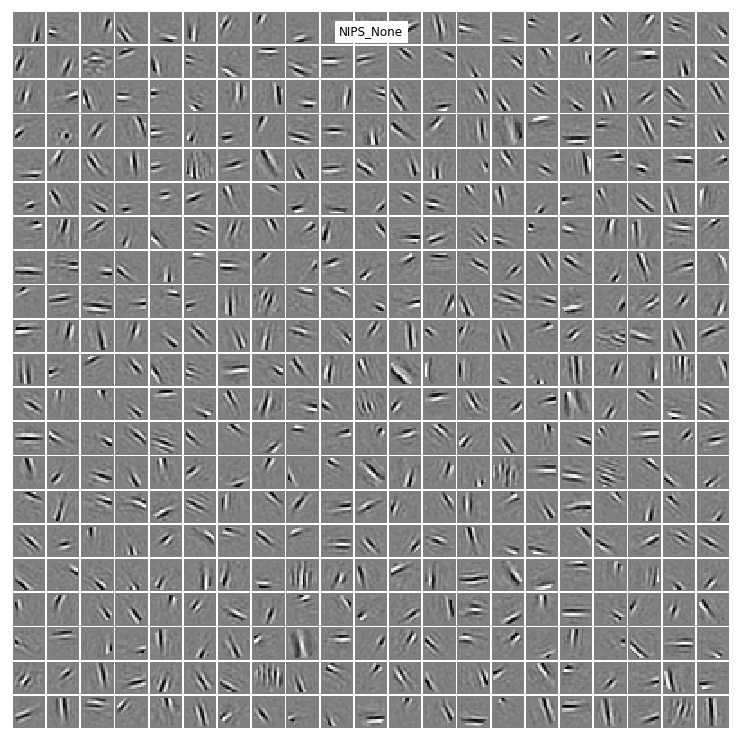

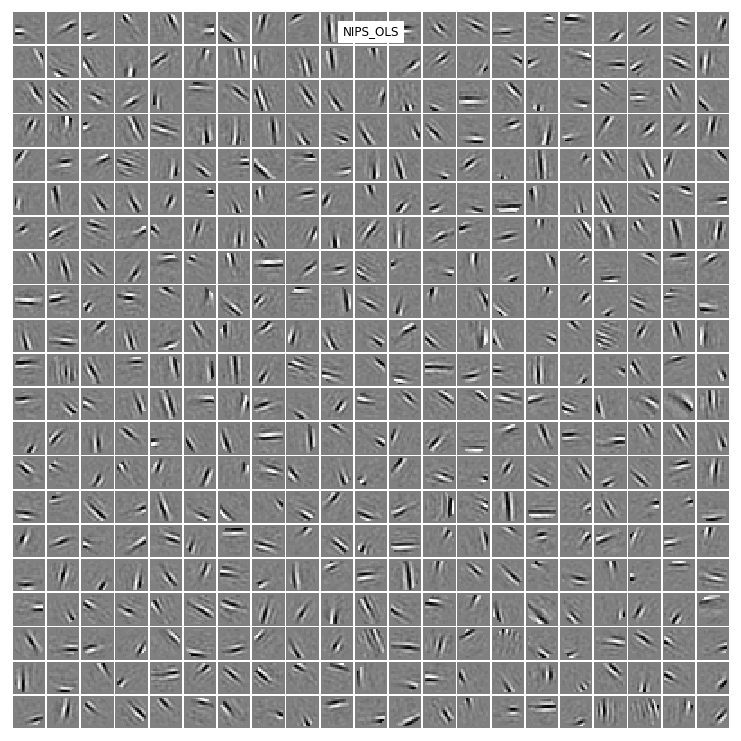

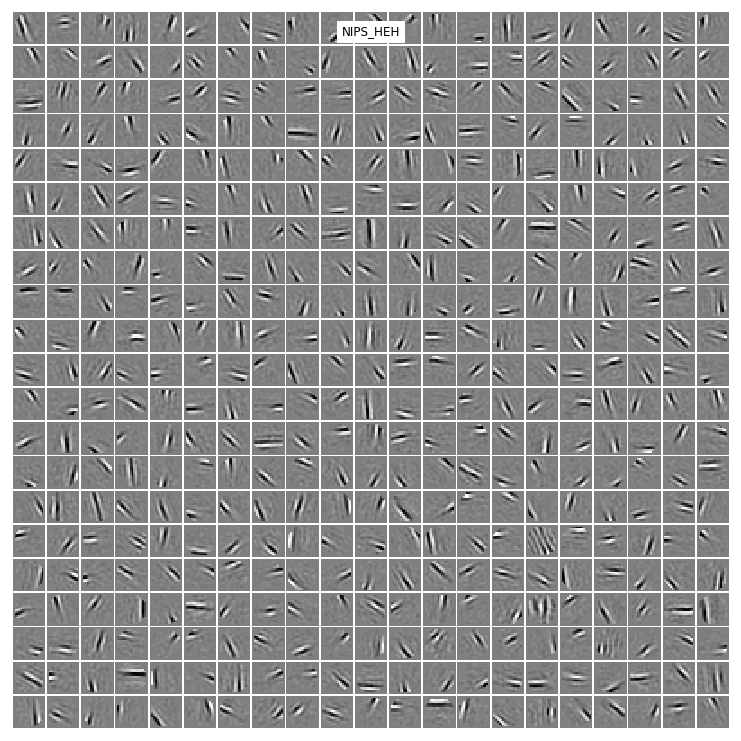

In [9]:
homeo_methods = ['None', 'OLS', 'HEH']

list_figures = ['show_dico', 'time_plot_error', 'time_plot_logL', 'time_plot_MC', 'show_Pcum']
list_figures = ['show_dico']
dico = {}
for homeo_method in homeo_methods:
    print(hl + hs + homeo_method + hs + hl)
    shl = SHL(homeo_method=homeo_method)
    dico[homeo_method] = shl.learn_dico(data=data, list_figures=list_figures, matname=tag + '_' + homeo_method)

    print('size of dictionary = (number of filters, size of imagelets) = ', dico[homeo_method].dictionary.shape)
    print('average of filters = ',  dico[homeo_method].dictionary.mean(axis=1).mean(), 
          '+/-',  dico[homeo_method].dictionary.mean(axis=1).std())
    SE = np.sqrt(np.sum(dico[homeo_method].dictionary**2, axis=1))
    print('average energy of filters = ', SE.mean(), '+/-', SE.std())


### panel A: plotting some dictionaries



In [10]:
pname = '/tmp/panel_A' #pname = fname + '_A'

In [11]:
from shl_scripts import show_dico
if DEBUG: show_dico(shl, dico[homeo_method], dim_graph=(2,5))

In [12]:
homeo_methods

['None', 'OLS', 'HEH']

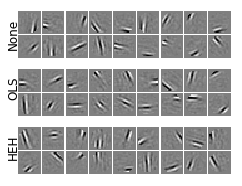

In [13]:
dim_graph = (2, 9)

subplotpars = dict( left=0.042, right=1., bottom=0., top=1., wspace=0.05, hspace=0.05,)
fig, axs = plt.subplots(3, 1, figsize=(fig_width/2, fig_width/(1+phi)), gridspec_kw=subplotpars)

for ax, homeo_method in zip(axs.ravel(), homeo_methods): 
    ax.axis(c='b', lw=2, axisbg='w')
    ax.set_facecolor('w')
    from shl_scripts import show_dico
    fig, ax = show_dico(shl, dico[homeo_method], dim_graph=dim_graph, fig=fig, ax=ax)
    # ax.set_ylabel(homeo_method)
    ax.text(-8, 7*dim_graph[0], homeo_method, fontsize=12, color='k', rotation=90)#, backgroundcolor='white'

for ext in FORMATS: fig.savefig(pname + ext, dpi=dpi_export)

In [14]:
if DEBUG: Image(pname +'.png')

In [15]:
if DEBUG: help(fig.subplots_adjust)

In [16]:
if DEBUG: help(plt.subplots)

In [17]:
if DEBUG: help(matplotlib.gridspec.GridSpec)

### panel B: quantitative comparison



In [18]:
pname = '/tmp/panel_B' #fname + '_B'

HACK
HACK
HACK


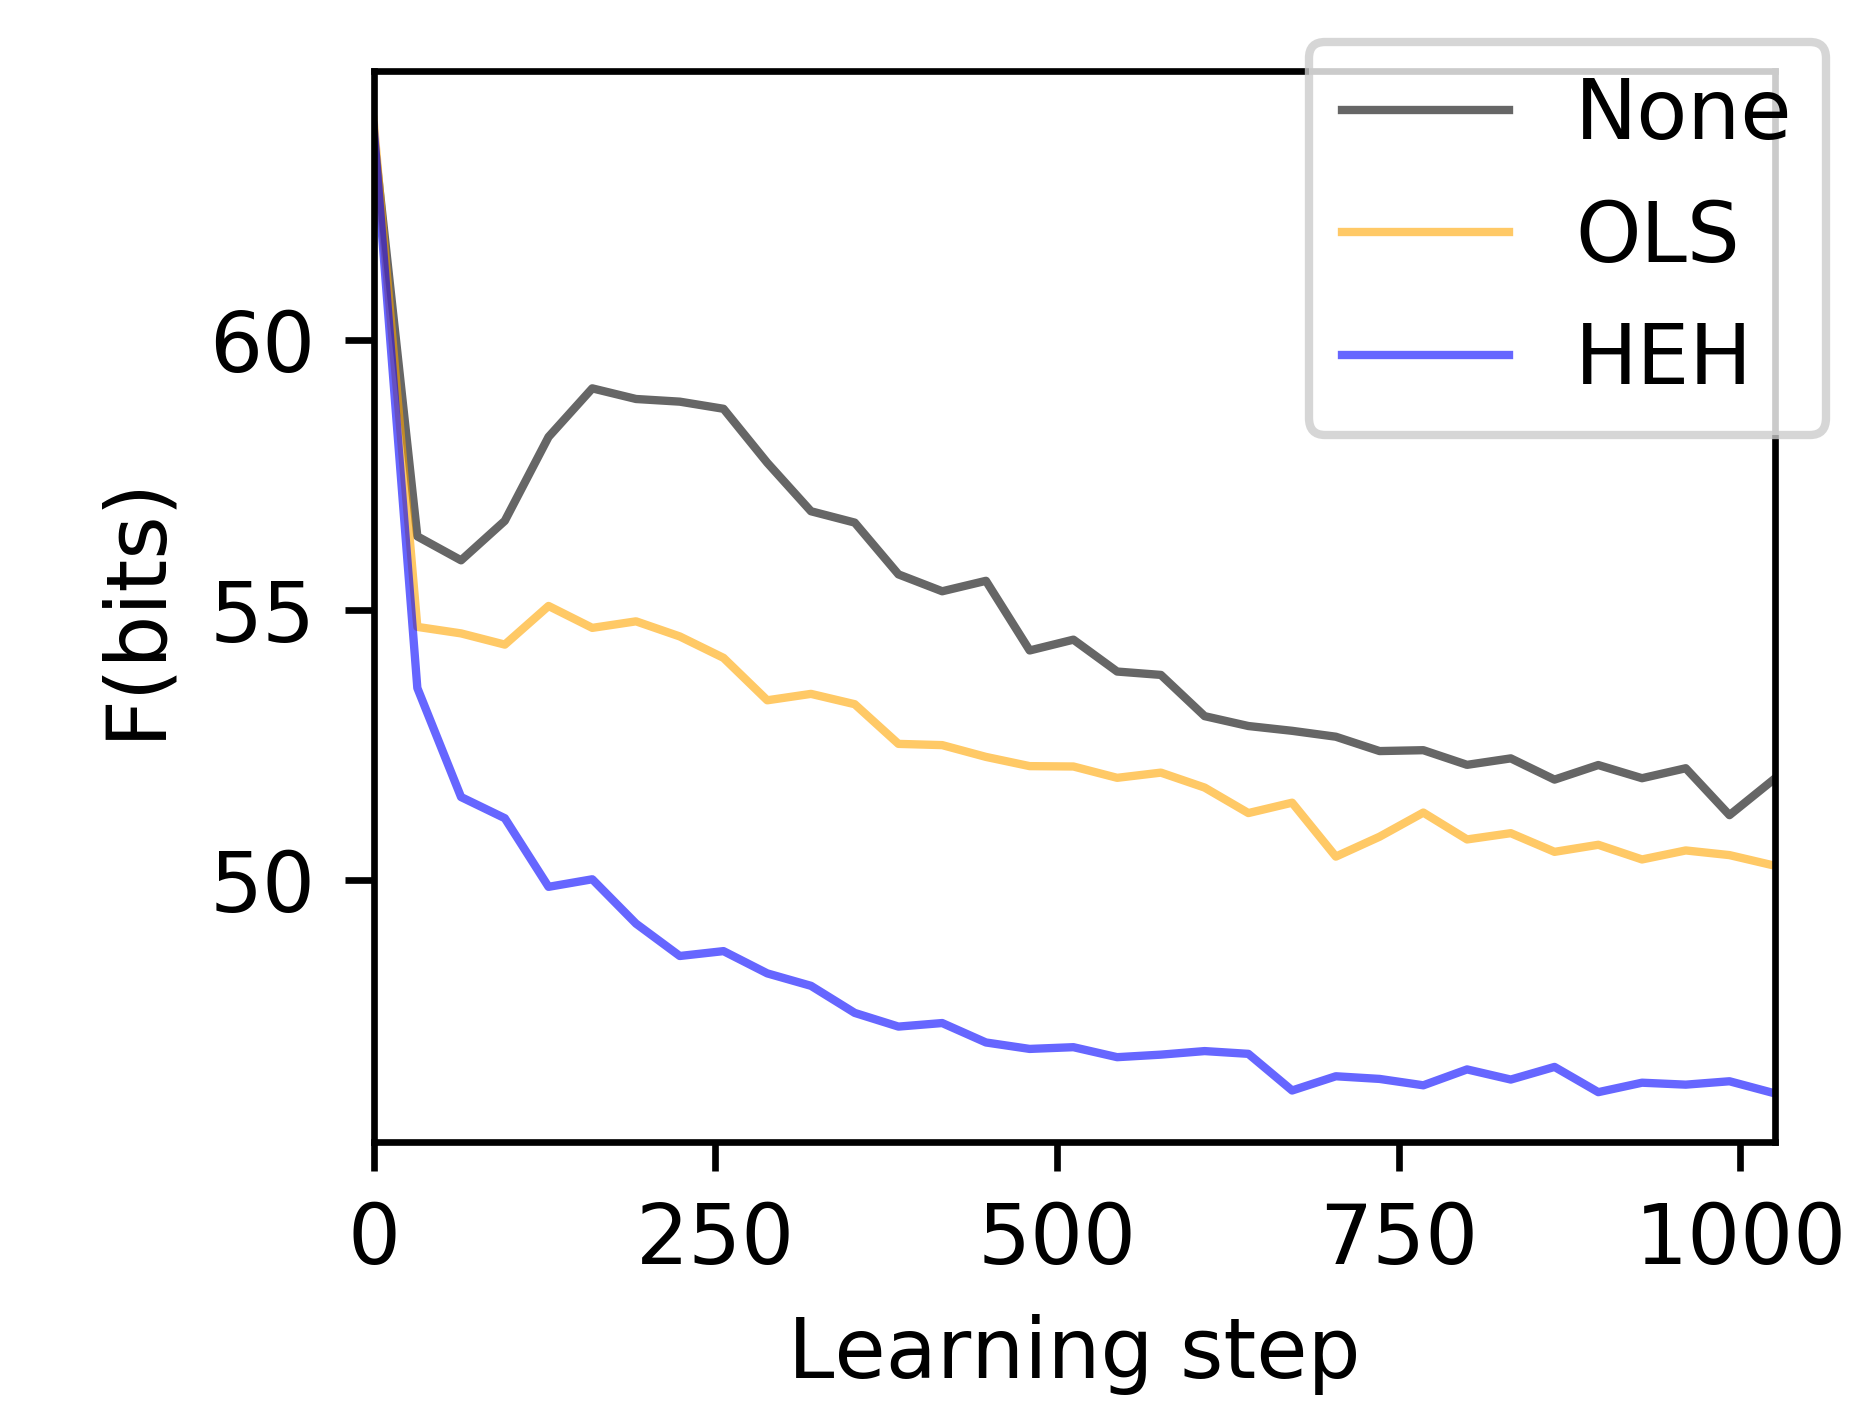

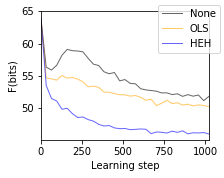

In [19]:
from shl_scripts import time_plot
variable = 'F'
subplotpars = dict(left=0.2, right=.95, bottom=0.2, top=.95)#, wspace=0.05, hspace=0.05,)
fig, ax = plt.subplots(1, 1, figsize=(fig_width/2, fig_width/(1+phi)), gridspec_kw=subplotpars)
colors = ['black', 'orange', 'blue']
for color, homeo_method in zip(colors, homeo_methods): 
    ax.axis(c='b', lw=2, axisbg='w')
    ax.set_facecolor('w')
    fig, ax = time_plot(shl, dico[homeo_method], variable=variable, unit='bits', color=color, label=homeo_method, alpha=.6, fig=fig, ax=ax)
    # ax.set_ylabel(homeo_method)
    #ax.text(-8, 7*dim_graph[0], homeo_method, fontsize=12, color='k', rotation=90)#, backgroundcolor='white'
fig.legend(loc='best')
for ext in FORMATS: fig.savefig(pname + ext, dpi=dpi_export)
Image(pname +'.png')


### Montage of the subplots


In [20]:
import tikzmagic

In [21]:
%load_ext tikzmagic

In [22]:
#DEBUG = True
if DEBUG: help(tikzmagic)

In [23]:
%%tikz -f pdf --save {fname}.pdf
\draw[white, fill=white] (0.\linewidth,0) rectangle (1.\linewidth, .382\linewidth) ;
\draw [anchor=north west] (.0\linewidth, .382\linewidth) node {\includegraphics[width=.5\linewidth]{/tmp/panel_A}};
\draw [anchor=north west] (.5\linewidth, .382\linewidth) node {\includegraphics[width=.5\linewidth]{/tmp/panel_B}};
\begin{scope}[font=\bf\sffamily\large]
\draw [anchor=west,fill=white] (.0\linewidth, .382\linewidth) node [above right=-3mm] {$\mathsf{A}$};
\draw [anchor=west,fill=white] (.53\linewidth, .382\linewidth) node [above right=-3mm] {$\mathsf{B}$};
\end{scope}

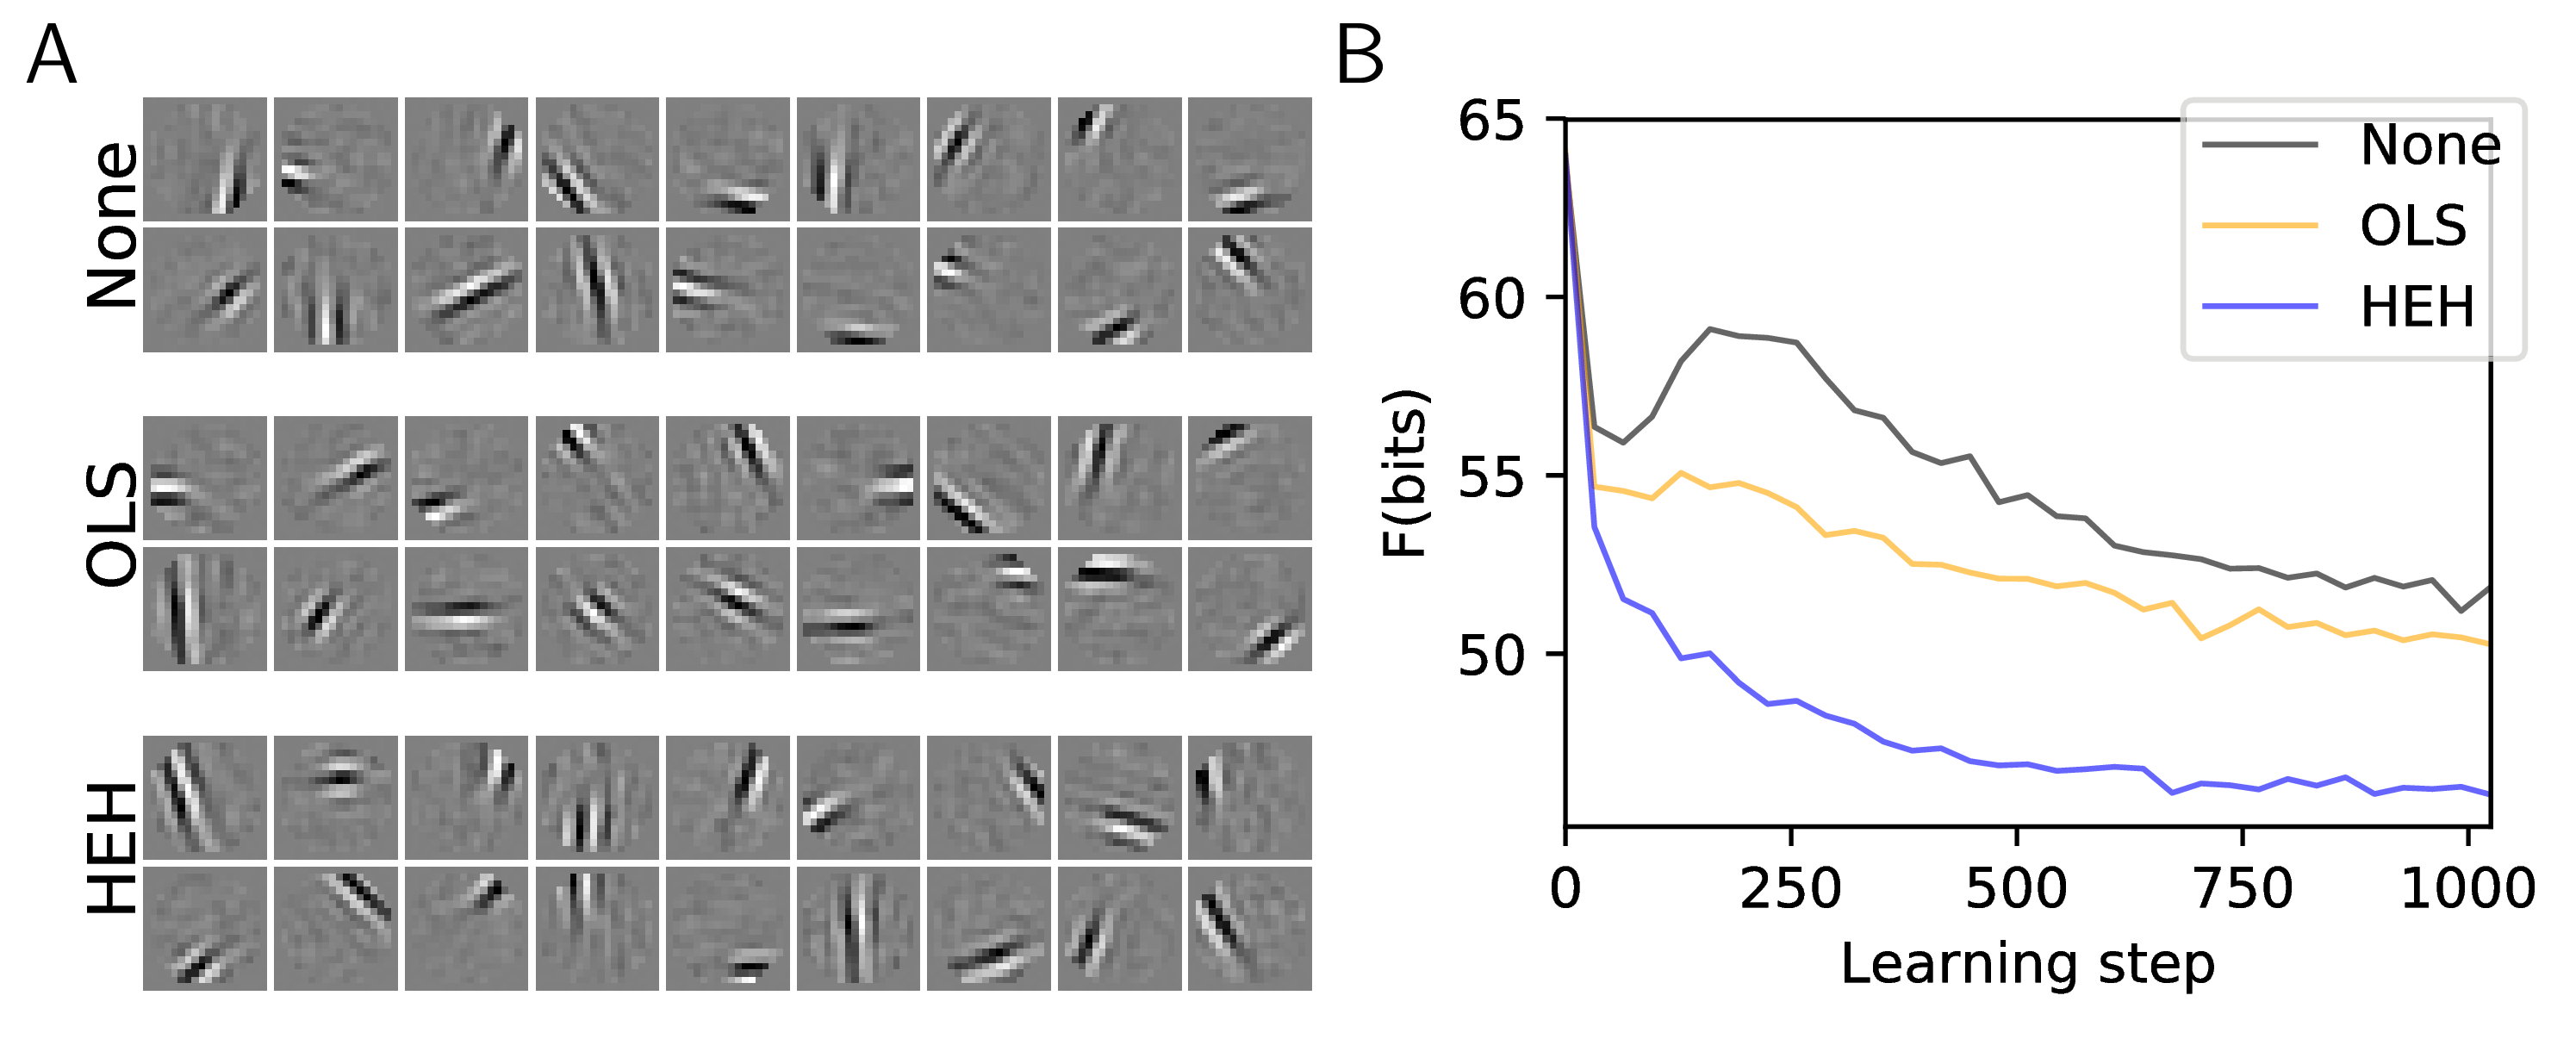

In [24]:
!convert  -density {dpi_export} {fname}.pdf {fname}.jpg
!convert  -density {dpi_export} {fname}.pdf {fname}.png
!convert  -density {dpi_export} -resize 5400  -units pixelsperinch -flatten  -compress lzw  -depth 8 {fname}.pdf {fname}.tiff
Image(fname +'.png')

In [25]:
!echo "width=" ; convert {fname}.tiff -format "%[fx:w]" info:
!echo ", \nheight=" ; convert {fname}.tiff -format "%[fx:h]" info:
!echo ", \nunit=" ; convert {fname}.tiff -format "%U" info:

width=
5400, 
height=
2178, 
unit=
PixelsPerInch

In [26]:
!identify {fname}.tiff

figure_map.tiff TIFF 5400x2178 5400x2178+0+0 8-bit sRGB 2008550B 0.000u 0:00.000


## figure 2: Histogram Equalization Homeostasis


\centering{
\begin{tikzpicture}
%\draw [anchor=north west] (0, .8\linewidth) node {\includegraphics[width=\linewidth]{PDF_nohomeo}};
%\draw [anchor=north west] (0, .4\linewidth) node {\includegraphics[width=\linewidth]{z_score}};
%\draw [anchor=north west] (0, .0) node {\includegraphics[width=\linewidth]{PDF_homeo}};
\draw (.7\linewidth, 0) node [above right=0mm] {$\mathsf{A}$};
\draw (.3\linewidth, 0) node [above right=0mm] {$\mathsf{B}$};
\draw (-.1\linewidth, 0) node [above right=0mm] {$\mathsf{C}$};
\draw (.0\linewidth, .38\linewidth) node [above right=0mm] {$\mathsf{box}$};
\draw (.85\linewidth, .38\linewidth) node [above right=0mm] {$\mathsf{box}$};
\end{tikzpicture}}



In [27]:
fname = 'figure_HEH'

🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶None🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶
🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶OLS🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶
🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶HEH🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶


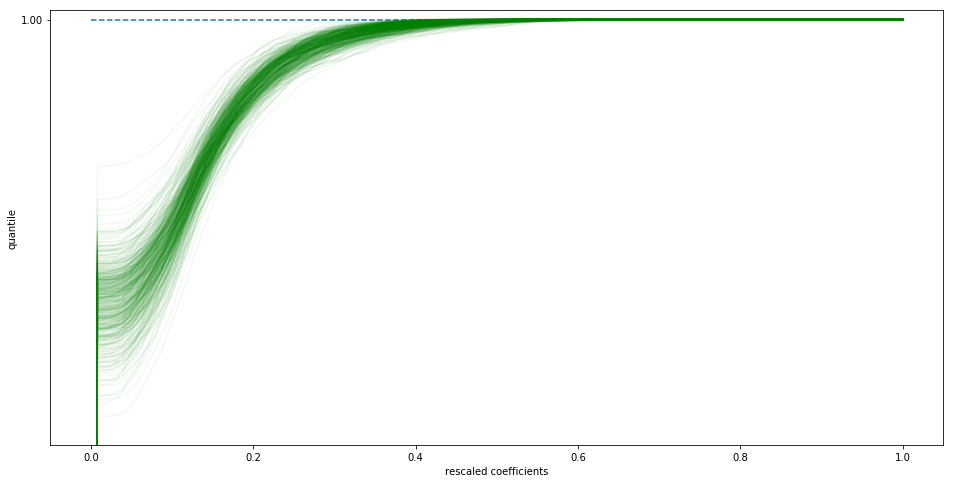

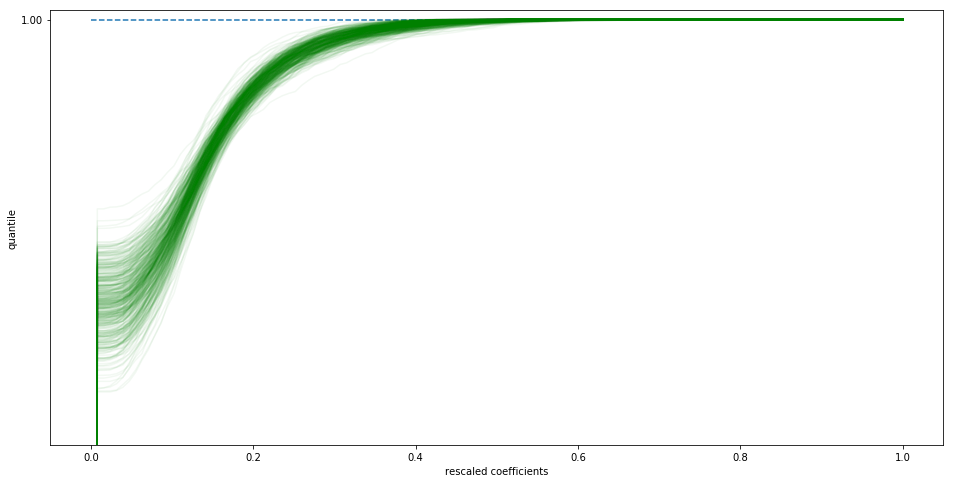

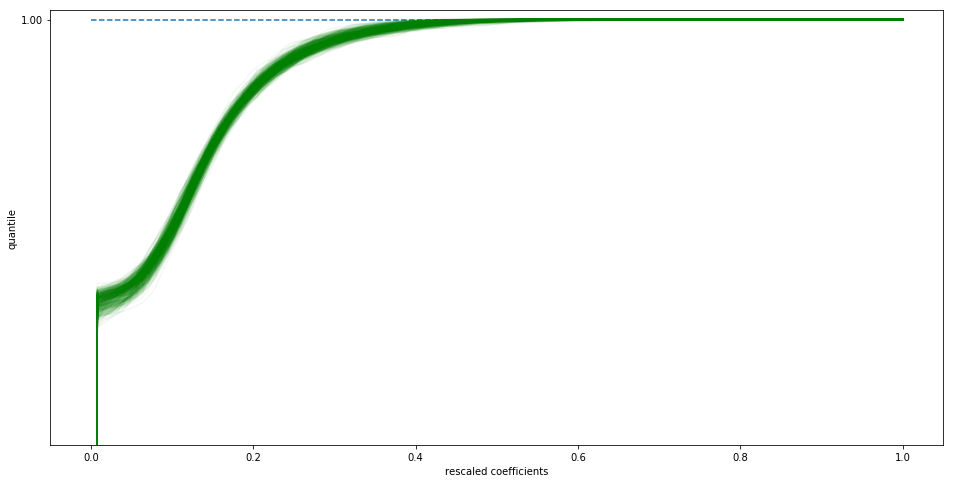

In [28]:
list_figures = ['show_Pcum']
pname = '/tmp/panel_A' #pname = fname + '_A'

hl, hs = 10*'🐶', 10*''
dico = {}
for homeo_method in homeo_methods:
    print(hl + hs + homeo_method + hs + hl)
    shl = SHL(homeo_method=homeo_method)
    dico[homeo_method] = shl.learn_dico(data=data, list_figures=list_figures, matname=tag + '_' + homeo_method)



In [29]:
pname = '/tmp/panel_B' #fname + '_B'

## coding

The learning itself is done via a gradient descent but is highly dependent on the coding / decoding algorithm. This belongs to a another function (in the [shl_encode.py](https://github.com/bicv/SHL_scripts/blob/master/shl_scripts/shl_encode.py) script)


### Montage of the subplots


In [30]:
%%tikz -f pdf --save {fname}.pdf
\draw[white, fill=white] (0.\linewidth,0) rectangle (1.\linewidth, .382\linewidth) ;
\draw [anchor=north west] (.0\linewidth, .382\linewidth) node {\includegraphics[width=.5\linewidth]{/tmp/panel_A}};
\draw [anchor=north west] (.5\linewidth, .382\linewidth) node {\includegraphics[width=.5\linewidth]{/tmp/panel_B}};
\begin{scope}[font=\bf\sffamily\large]
\draw [anchor=west,fill=white] (.0\linewidth, .382\linewidth) node [above right=-3mm] {$\mathsf{A}$};
\draw [anchor=west,fill=white] (.53\linewidth, .382\linewidth) node [above right=-3mm] {$\mathsf{B}$};
\end{scope}

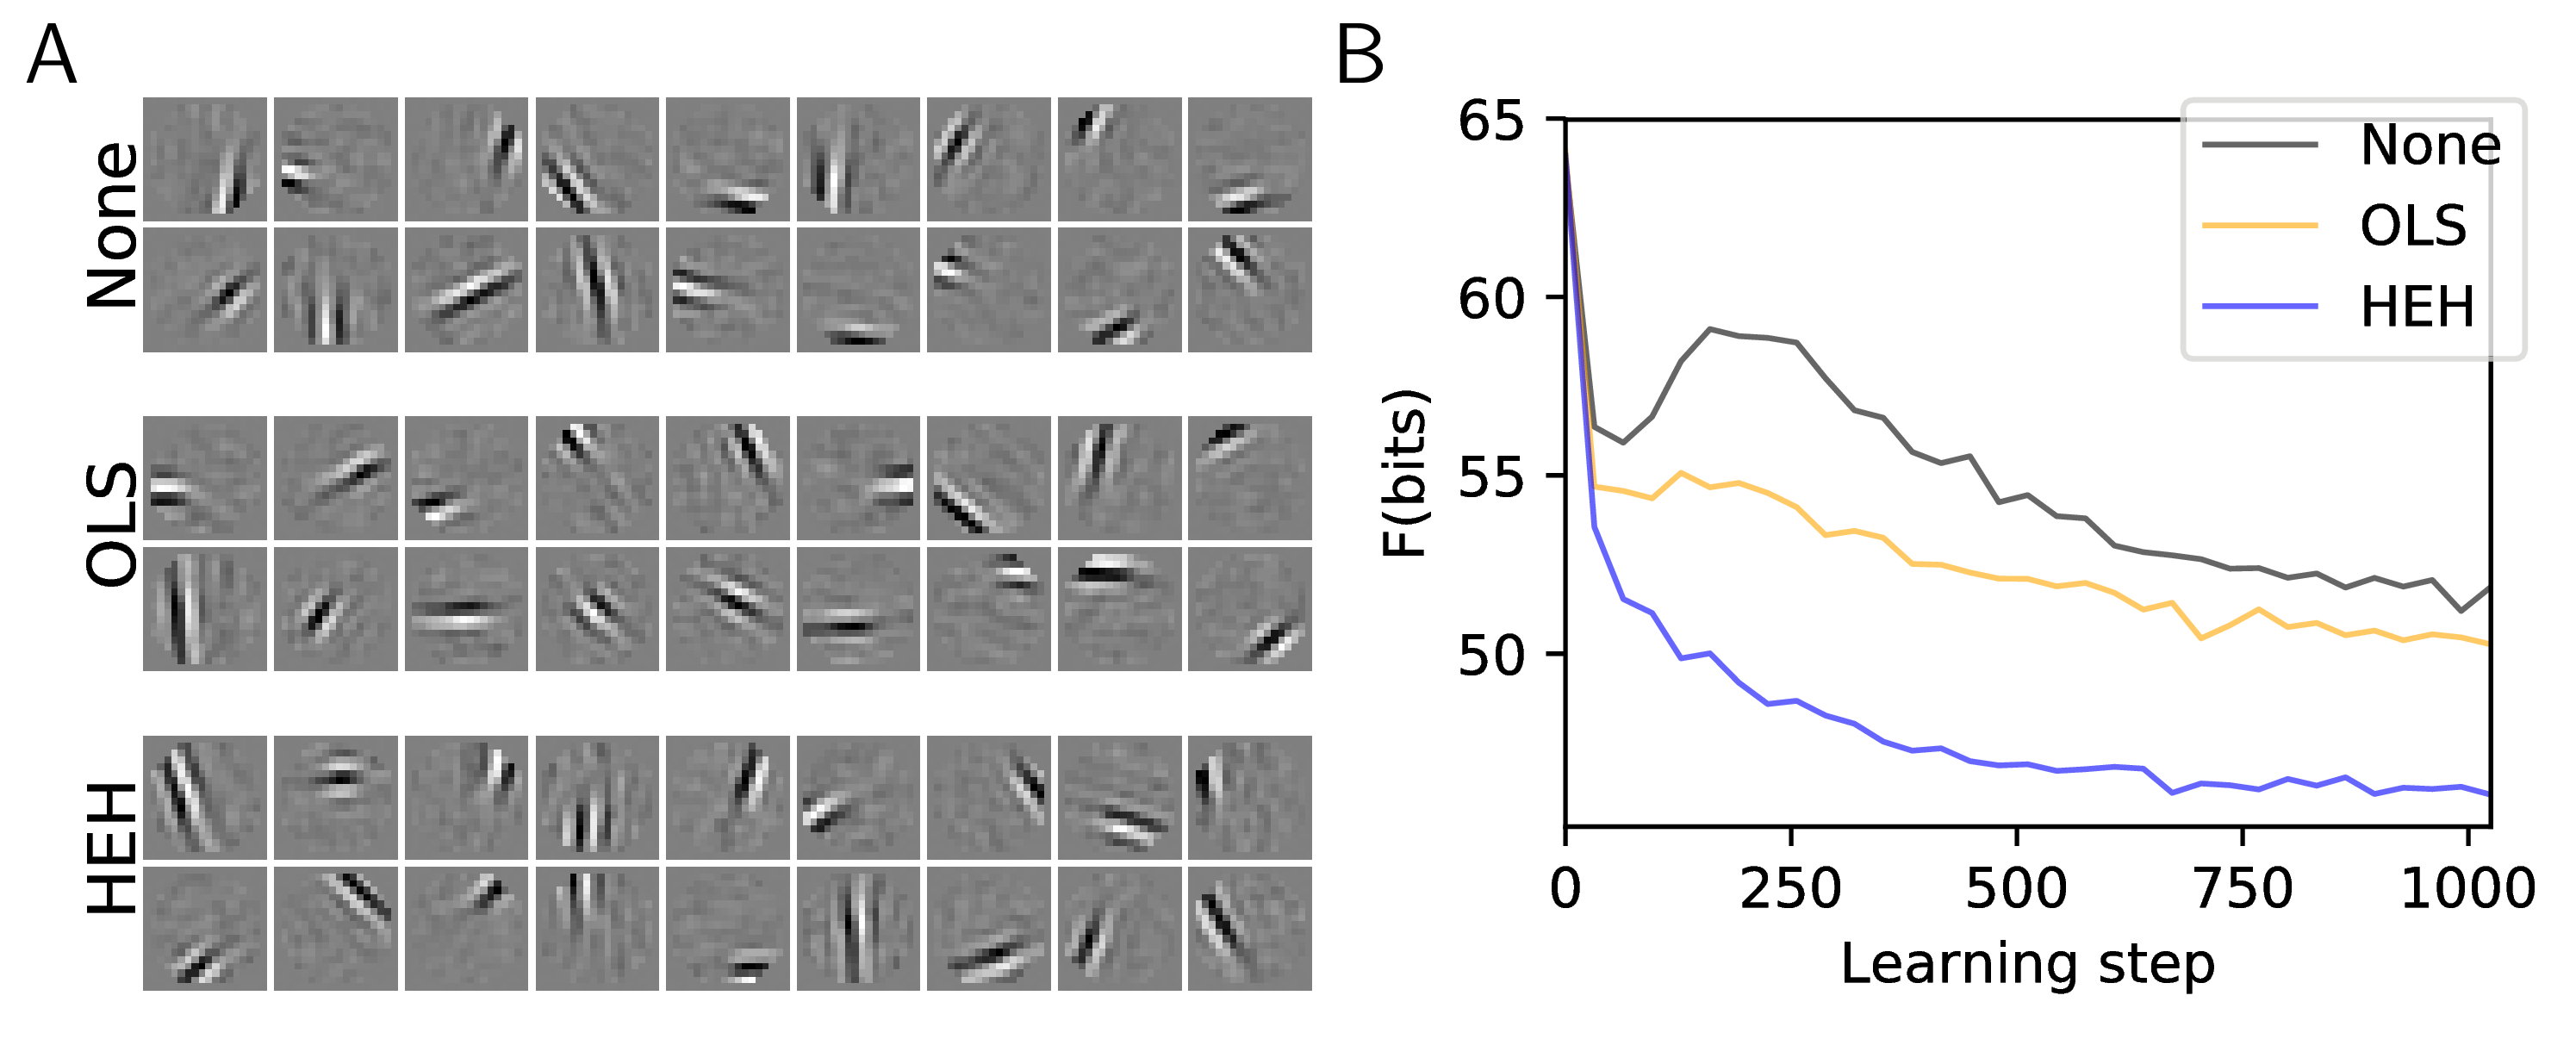

In [31]:
!convert  -density {dpi_export} {fname}.pdf {fname}.jpg
!convert  -density {dpi_export} {fname}.pdf {fname}.png
!convert  -density {dpi_export} -resize 5400  -units pixelsperinch -flatten  -compress lzw  -depth 8 {fname}.pdf {fname}.tiff
Image(fname +'.png')

In [32]:
!echo "width=" ; convert {fname}.tiff -format "%[fx:w]" info:
!echo ", \nheight=" ; convert {fname}.tiff -format "%[fx:h]" info:
!echo ", \nunit=" ; convert {fname}.tiff -format "%U" info:

width=
5400, 
height=
2178, 
unit=
PixelsPerInch

In [33]:
!identify {fname}.tiff

figure_HEH.tiff TIFF 5400x2178 5400x2178+0+0 8-bit sRGB 2008550B 0.000u 0:00.000


## figure 3:  


\centering{
\begin{tikzpicture}
%\draw [anchor=north west] (0, .39\linewidth) node {\includegraphics[width=.47\linewidth]{dico_MP}};
%\draw [anchor=north west] (.5\linewidth, .39\linewidth) node {\includegraphics[width=.47\linewidth]{dico_SN}};
%\draw [anchor=north west] (.25\linewidth, -.1\linewidth) node {\includegraphics[width=.47\linewidth]{dico_MEUL}};
%\draw [anchor=north west] (.1\linewidth, -.6\linewidth) node {\includegraphics[width=.8\linewidth]{Comparison_reconstruction}};
\draw (0, .39\linewidth) node [above right=0mm] {$\mathsf{A}$};
\draw (.5\linewidth, .39\linewidth) node [above right=0mm] {$\mathsf{B}$};
%\draw (.2\linewidth, -.16\linewidth) node [above right=0mm] {$\mathsf{C}$};
%\draw (.05\linewidth, -.67\linewidth) node [above right=0mm] {$\mathsf{D}$};
\draw (.0\linewidth, .0\linewidth) node [above right=0mm] {$\mathsf{box}$};
\draw (.85\linewidth, .0\linewidth) node [above right=0mm] {$\mathsf{box}$};
\end{tikzpicture}}

### learning




In [34]:
fname = 'figure_HAP'

🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶EMP🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶
size of dictionary = (number of filters, size of imagelets) =  (441, 324)
average of filters =  9.414615040268616e-06 +/- 0.0012253311037326293
average energy of filters =  1.0 +/- 4.1962486042515756e-17
🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶HAP🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶
size of dictionary = (number of filters, size of imagelets) =  (441, 324)
average of filters =  -2.7254248689297576e-05 +/- 0.0012054992205241832
average energy of filters =  1.0 +/- 3.8488312480383476e-17
🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶HEH🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶
size of dictionary = (number of filters, size of imagelets) =  (441, 324)
average of filters =  8.795459492566386e-06 +/- 0.0011308545789973006
average energy of filters =  1.0 +/- 3.4667710629733767e-17


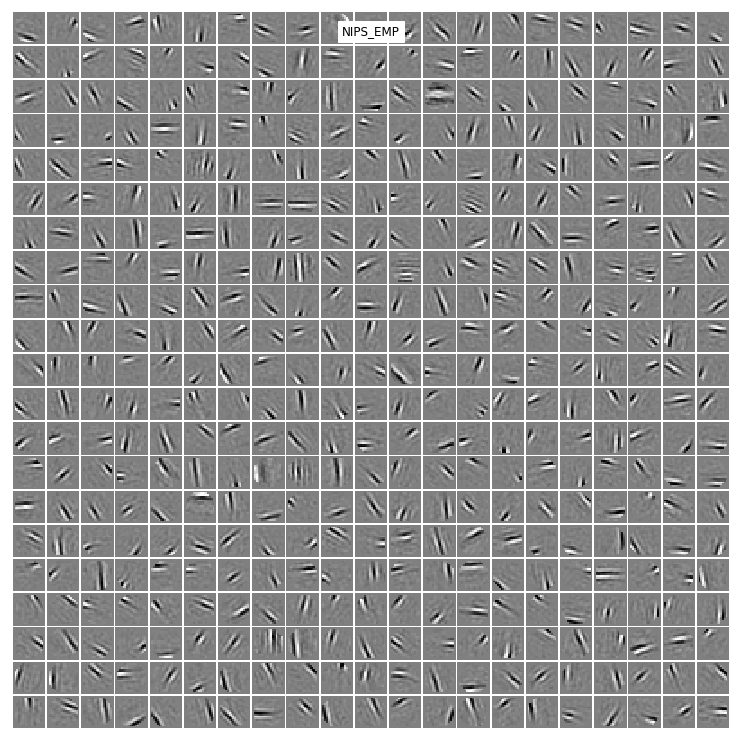

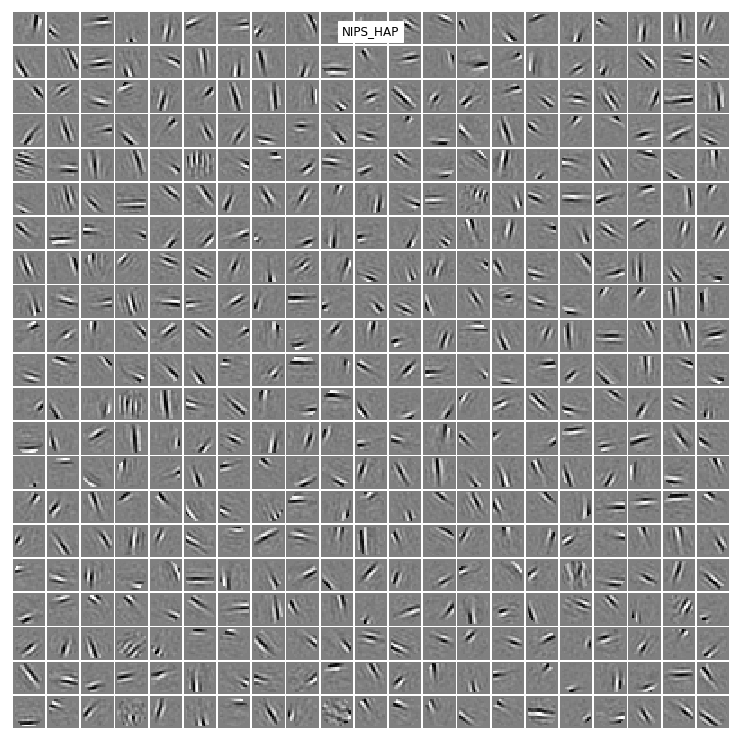

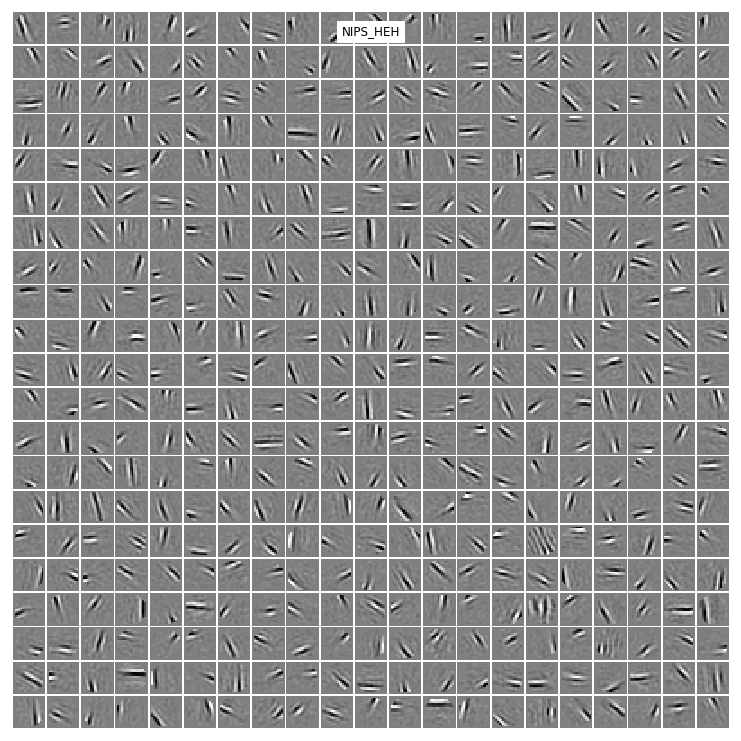

In [35]:
homeo_methods = ['EMP', 'HAP', 'HEH']

list_figures = ['show_dico', 'time_plot_error', 'time_plot_logL', 'time_plot_MC', 'show_Pcum']
list_figures = ['show_dico']
dico = {}
for homeo_method in homeo_methods:
    print(hl + hs + homeo_method + hs + hl)
    shl = SHL(homeo_method=homeo_method)
    dico[homeo_method] = shl.learn_dico(data=data, list_figures=list_figures, matname=tag + '_' + homeo_method)

    print('size of dictionary = (number of filters, size of imagelets) = ', dico[homeo_method].dictionary.shape)
    print('average of filters = ',  dico[homeo_method].dictionary.mean(axis=1).mean(), 
          '+/-',  dico[homeo_method].dictionary.mean(axis=1).std())
    SE = np.sqrt(np.sum(dico[homeo_method].dictionary**2, axis=1))
    print('average energy of filters = ', SE.mean(), '+/-', SE.std())


### panel A: plotting some dictionaries



In [36]:
pname = '/tmp/panel_A' #pname = fname + '_A'

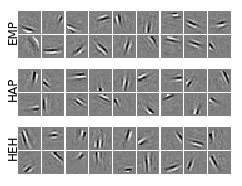

In [37]:
subplotpars = dict( left=0.042, right=1., bottom=0., top=1., wspace=0.05, hspace=0.05,)
fig, axs = plt.subplots(3, 1, figsize=(fig_width/2, fig_width/(1+phi)), gridspec_kw=subplotpars)

for ax, homeo_method in zip(axs.ravel(), homeo_methods): 
    ax.axis(c='b', lw=2, axisbg='w')
    ax.set_facecolor('w')
    from shl_scripts import show_dico
    fig, ax = show_dico(shl, dico[homeo_method], dim_graph=dim_graph, fig=fig, ax=ax)
    # ax.set_ylabel(homeo_method)
    ax.text(-8, 7*dim_graph[0], homeo_method, fontsize=12, color='k', rotation=90)#, backgroundcolor='white'

for ext in FORMATS: fig.savefig(pname + ext, dpi=dpi_export)

### panel B: quantitative comparison



In [38]:
pname = '/tmp/panel_B' #fname + '_B'

HACK
HACK
HACK


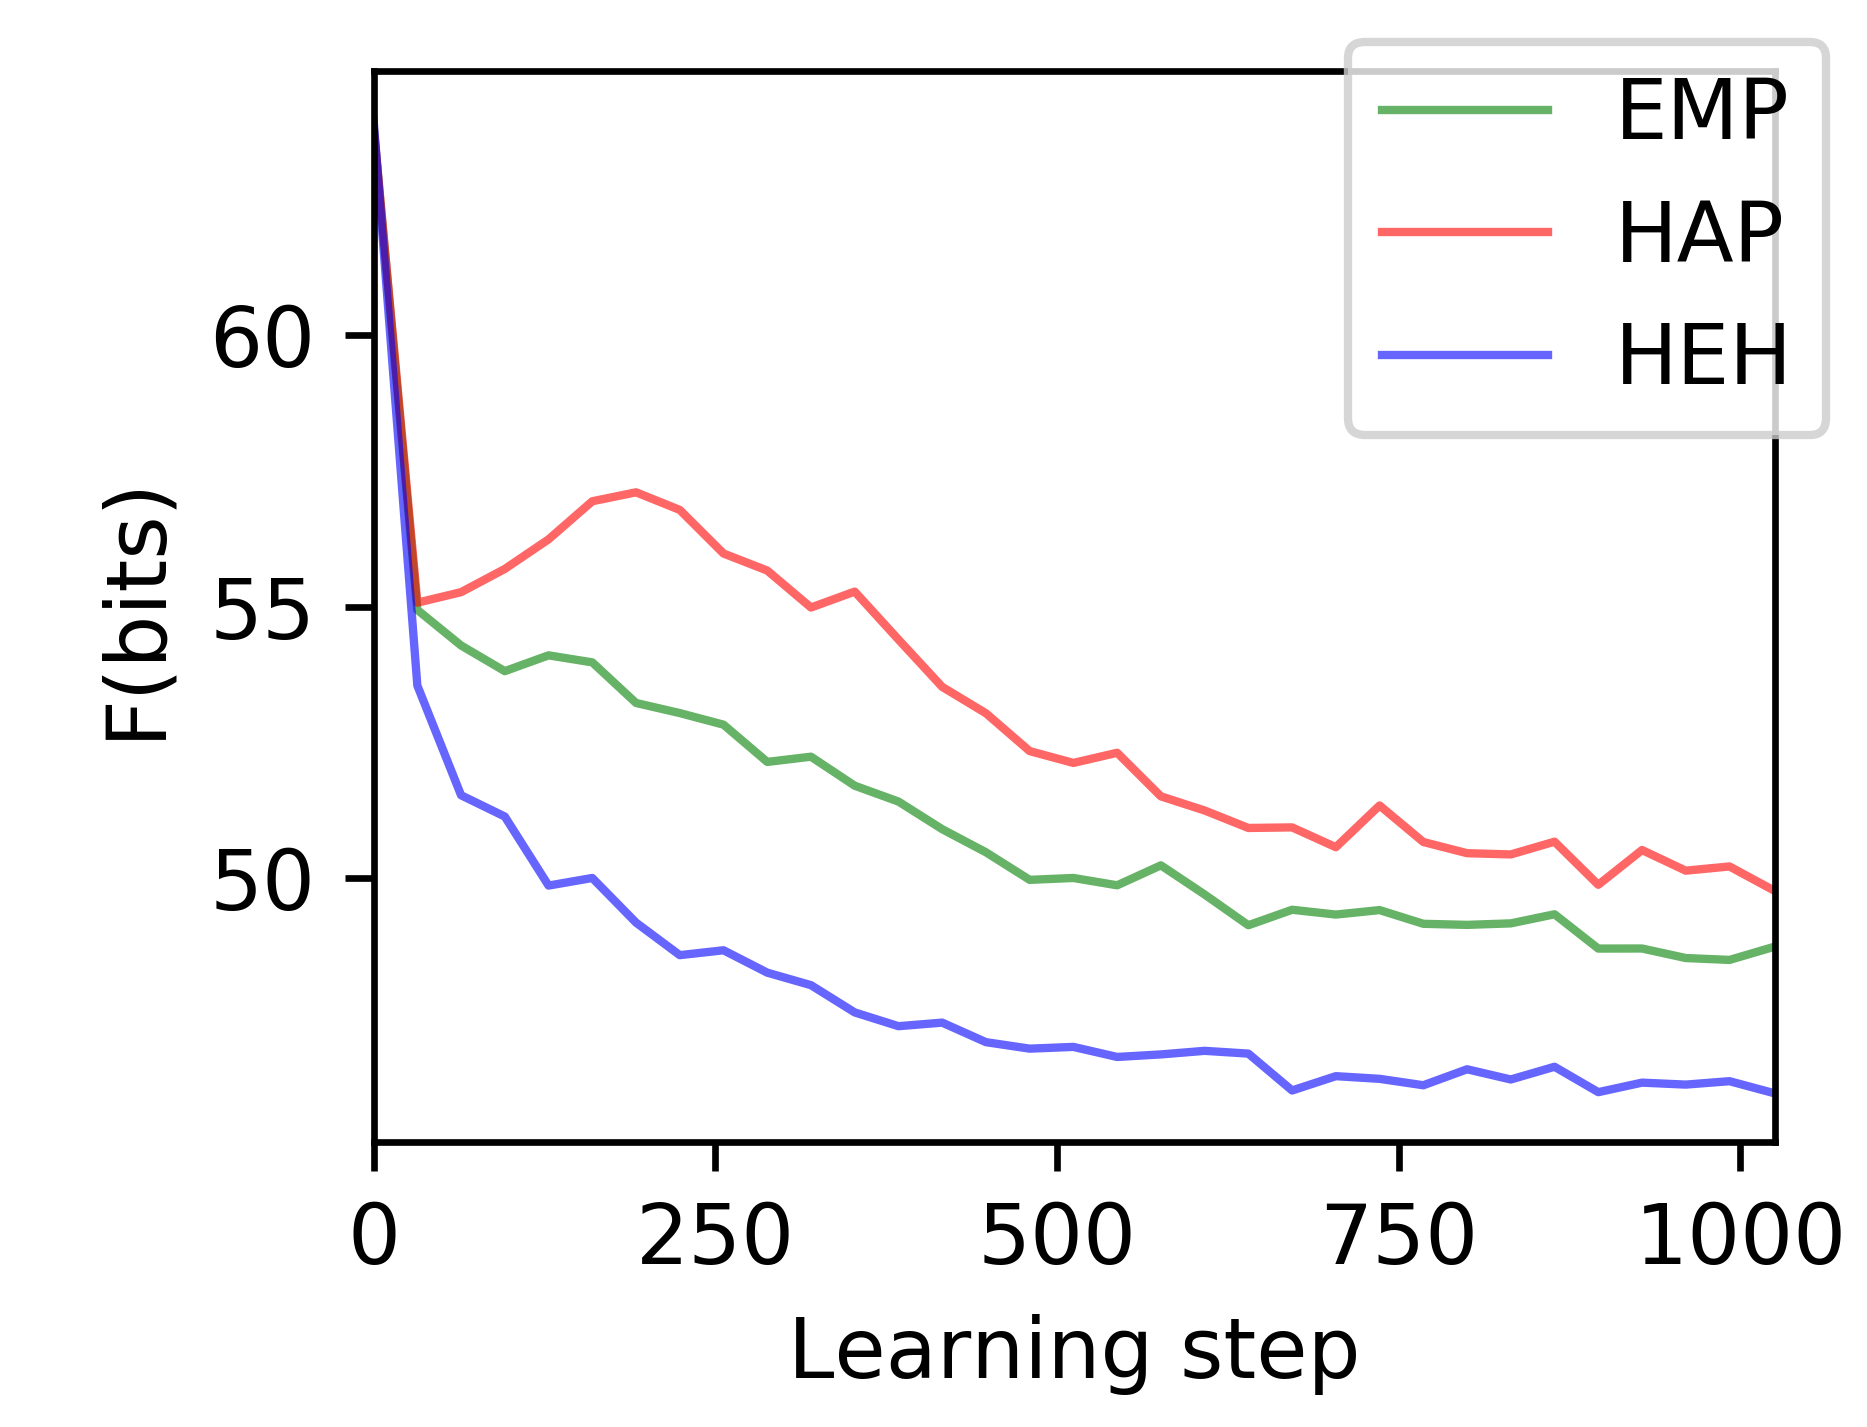

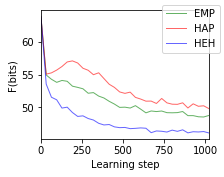

In [39]:
from shl_scripts import time_plot
variable = 'F'
subplotpars = dict(left=0.2, right=.95, bottom=0.2, top=.95)#, wspace=0.05, hspace=0.05,)

fig, ax = plt.subplots(1, 1, figsize=(fig_width/2, fig_width/(1+phi)), gridspec_kw=subplotpars)
colors = ['green', 'red', 'blue']
for color, homeo_method in zip(colors, homeo_methods): 
    ax.axis(c='b', lw=2, axisbg='w')
    ax.set_facecolor('w')
    fig, ax = time_plot(shl, dico[homeo_method], variable=variable, unit='bits', color=color, label=homeo_method, alpha=.6, fig=fig, ax=ax)
    # ax.set_ylabel(homeo_method)
    #ax.text(-8, 7*dim_graph[0], homeo_method, fontsize=12, color='k', rotation=90)#, backgroundcolor='white'
fig.legend(loc='best')
for ext in FORMATS: fig.savefig(pname + ext, dpi=dpi_export)
Image(pname +'.png')

In [40]:
if DEBUG: Image(pname +'.png')


### Montage of the subplots


In [41]:
%%tikz -f pdf --save {fname}.pdf
\draw[white, fill=white] (0.\linewidth,0) rectangle (1.\linewidth, .382\linewidth) ;
\draw [anchor=north west] (.0\linewidth, .382\linewidth) node {\includegraphics[width=.5\linewidth]{/tmp/panel_A}};
\draw [anchor=north west] (.5\linewidth, .382\linewidth) node {\includegraphics[width=.5\linewidth]{/tmp/panel_B}};
\begin{scope}[font=\bf\sffamily\large]
\draw [anchor=west,fill=white] (.0\linewidth, .382\linewidth) node [above right=-3mm] {$\mathsf{A}$};
\draw [anchor=west,fill=white] (.53\linewidth, .382\linewidth) node [above right=-3mm] {$\mathsf{B}$};
\end{scope}

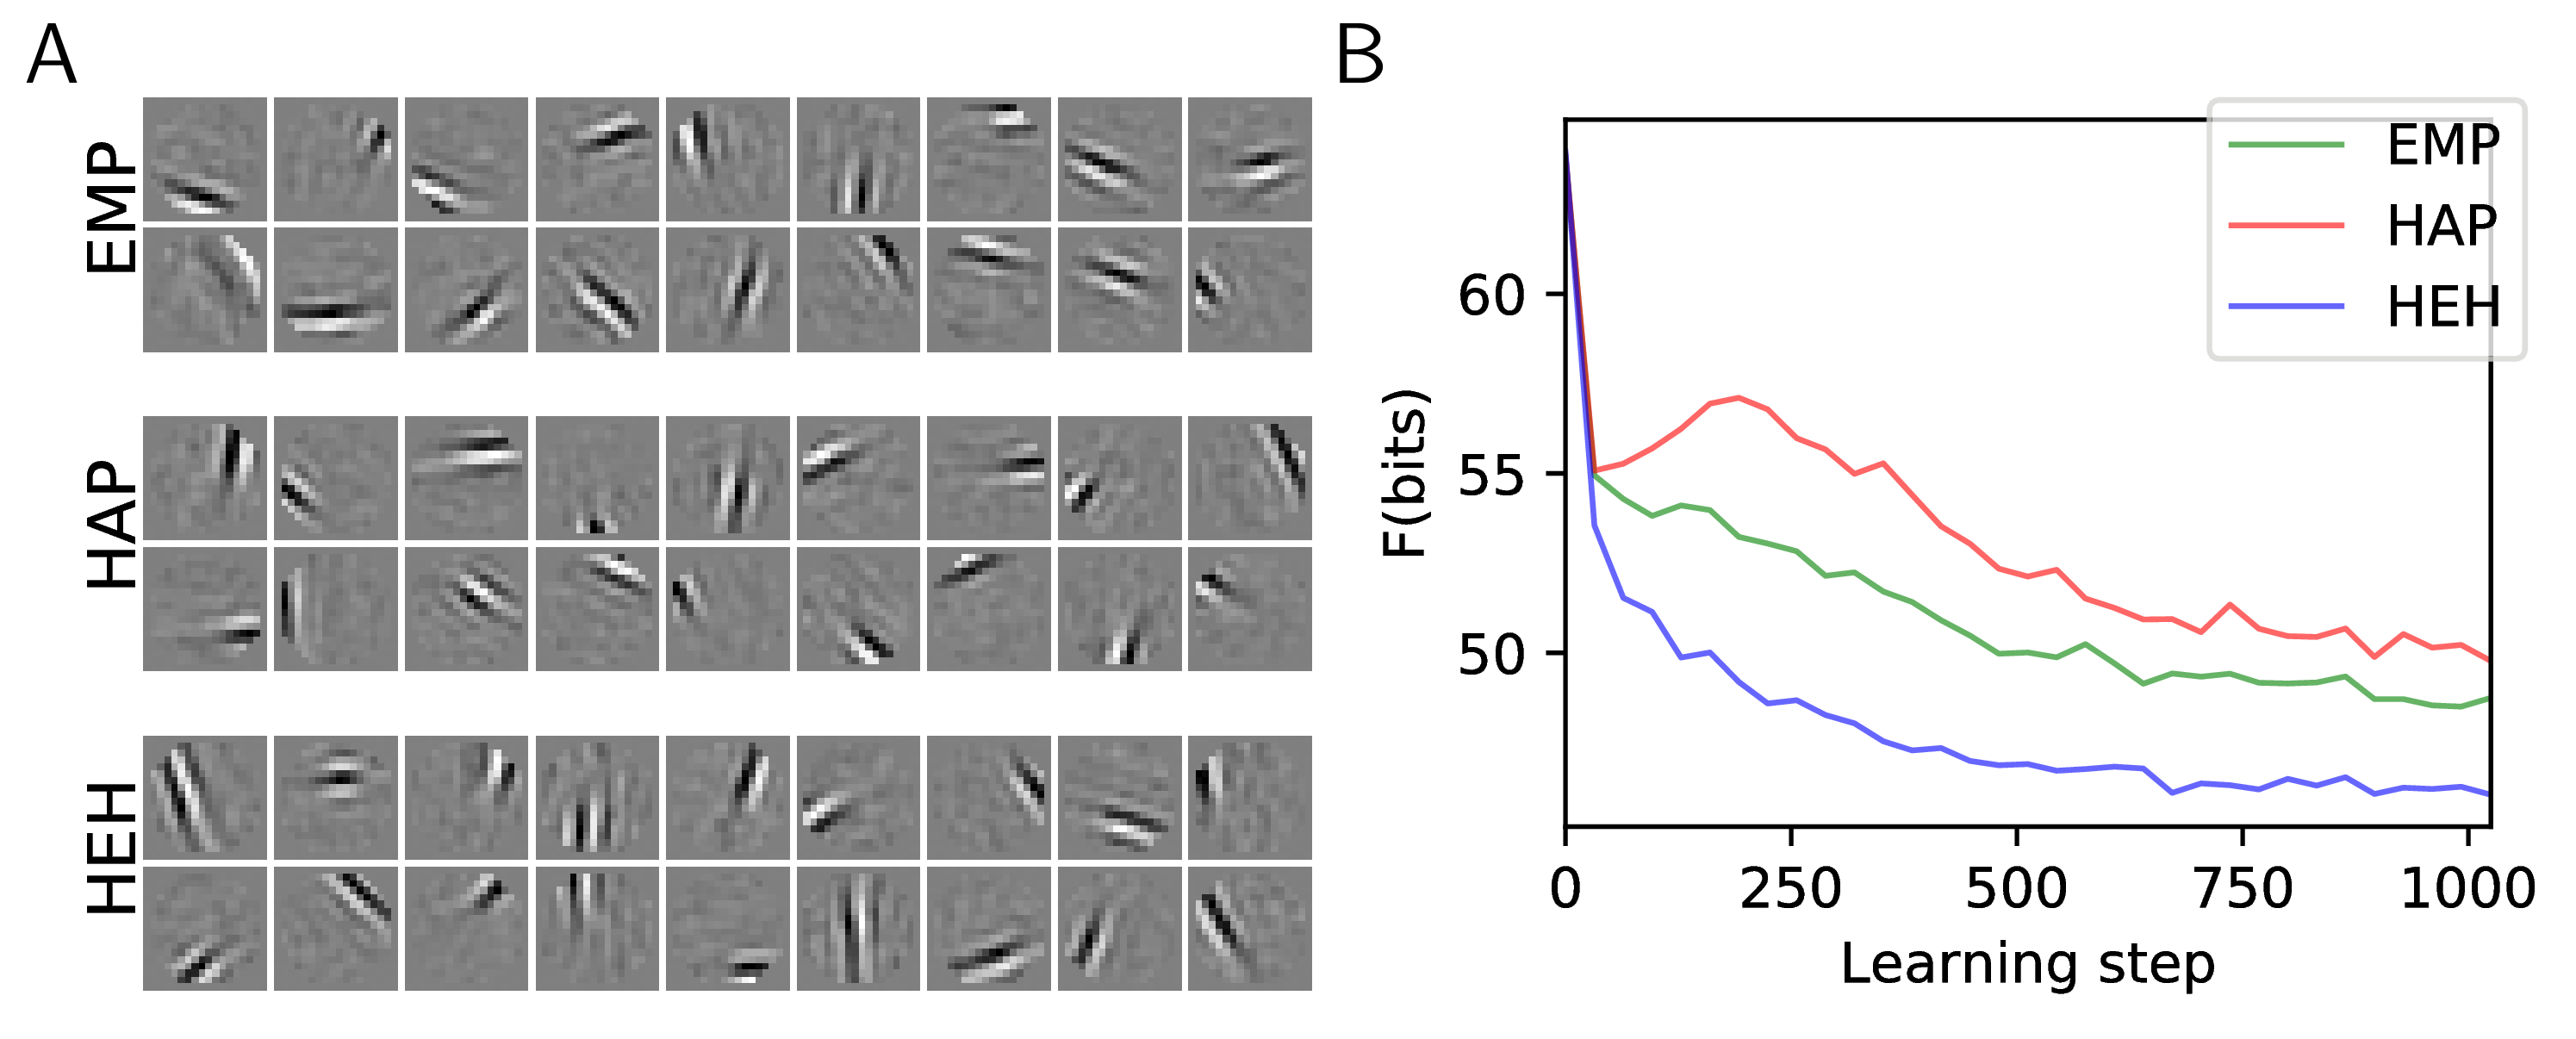

In [42]:
!convert  -density {dpi_export} {fname}.pdf {fname}.jpg
!convert  -density {dpi_export} {fname}.pdf {fname}.png
!convert  -density {dpi_export} -resize 5400  -units pixelsperinch -flatten  -compress lzw  -depth 8 {fname}.pdf {fname}.tiff
Image(fname +'.png')

In [43]:
!echo "width=" ; convert {fname}.tiff -format "%[fx:w]" info:
!echo ", \nheight=" ; convert {fname}.tiff -format "%[fx:h]" info:
!echo ", \nunit=" ; convert {fname}.tiff -format "%U" info:

width=
5400, 
height=
2178, 
unit=
PixelsPerInch

In [44]:
!identify {fname}.tiff

figure_HAP.tiff TIFF 5400x2178 5400x2178+0+0 8-bit sRGB 1995360B 0.000u 0:00.000


## coding

The learning itself is done via a gradient descent but is highly dependent on the coding / decoding algorithm. This belongs to a another function (in the [shl_encode.py](https://github.com/bicv/SHL_scripts/blob/master/shl_scripts/shl_encode.py) script)

##  version control

In [ ]:
!git s

## Version used

In [45]:
%load_ext version_information
%version_information numpy, shl_scripts

Software versions
Python 3.6.5 64bit [GCC 4.2.1 Compatible Apple LLVM 9.1.0 (clang-902.0.39.1)]
IPython 6.4.0
OS Darwin 17.5.0 x86_64 i386 64bit
numpy 1.14.3
shl_scripts 20171221
Thu May 17 16:28:12 2018 CEST